#  Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

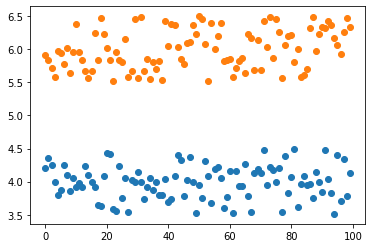

In [2]:
class1 = np.random.rand(100) +np.full(100, 3.5)
class2 = np.random.rand(100) + np.full(100, 5.5)
x = np.arange(0,100)
plt.plot(x, class1, "o")
plt.plot(x, class2, "o")
plt.show()

## Perceptron

Now i want to create a "dataset", where the data of the 2 classes are shuffled, and there's a column with the class labels.

In [19]:
a = np.append(class1, np.ones(100)).reshape(2, 100).transpose()
b = np.append(class2, np.full(100, -1)).reshape(2,100).transpose()


In [20]:
dataset = np.append(a, b).reshape(200,2)
np.random.shuffle(dataset)

In [21]:
"""%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

def drawPlane(ax, class1, class2, w):
    x = np.arange(0,100)
    ax.clear()
    low = 0
    high = 100
    plt.xlim(-1, 101), plt.ylim(np.min(dataset[:,0]) - 0.5, np.max(dataset[:,0] + 0.5))
    ax.plot(x, class1, "o")
    ax.plot(x, class2, "o")
    if( w[1] != 0):
        ax.plot([low, high], [ -w[0]/w[1], -w[0]/w[1]])
    fig.canvas.draw()
    plt.pause(0.1)
"""

def perceptronLoop(dataset, iters):
    w = np.zeros(2) #w0 and w1
    w[0] = 1
    k = 0
    while(k < iters):
        n = k % dataset.shape[0]
        x = dataset[n][0]
        c = dataset[n][1]

        if (w[0] + w[1]*x)*(c) <0:
            w[1:] = w[1:] + x*c
            w[0] = w[0] + c
        k = k+1
        #drawPlane(ax, class1, class2, w)
    return w    

In [22]:
w = perceptronLoop(dataset, 1000)
print(w)

[ 2.         -0.37574984]


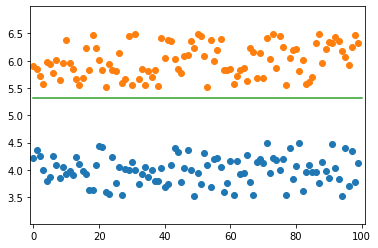

In [23]:
low = 0
high = 100
plt.xlim(-1, 101), plt.ylim(np.min(dataset[:,0]) - 0.5, np.max(dataset[:,0] + 0.5))
plt.plot(x, class1, "o")
plt.plot(x, class2, "o")
plt.plot([low, high], [-w[0]/w[1], -w[0]/w[1]])
plt.show()